# Importing

In [1]:
# Basics Importation 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas_profiling
import numpy as np
import re
import seaborn as sns
from scipy import stats
from scipy.stats import norm, skew #for some statistics
from scipy.stats import skew 
from scipy.stats import boxcox_normmax
from scipy.stats import pearsonr
%matplotlib inline
plt.style.use('ggplot')

# For Detailed Stats Output
import statsmodels.api as sm
# The linear regression models 
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, LassoCV, ElasticNetCV
# Instantiating the linear regression models
ols = LinearRegression()
ridge = Ridge()
lasso  = Lasso()
lassocv = LassoCV()
elasticnet = ElasticNet()
elasticnetcv = ElasticNetCV()
# The tree model
from sklearn import tree
# Instantiating the tree model (regression type)
regressor = tree.DecisionTreeRegressor()
# The ensemble model for random forest and bagging
from sklearn import ensemble
# Instantiating the ensemble models
randomForest = ensemble.RandomForestRegressor()
bagging      = ensemble.BaggingRegressor()
# Instantiating the boost models
gbm          = ensemble.GradientBoostingRegressor()
abr          = ensemble.AdaBoostRegressor()
# xg boost
import xgboost as xgb
# lg boost
import lightgbm as lgb
# K mean clustering
from sklearn.cluster import KMeans
kmeans = KMeans()
# The model selection for cross validation, k fold splits, train_test_split, grid search etc. 
import sklearn.model_selection as ms
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
# Some automatic feature selection functions (recursive finding, best feature selection etc.)
import sklearn.feature_selection as fs
# Importing the different error evaluation/metrics
from sklearn import metrics
from sklearn.metrics import silhouette_score

# Making it so that we can see all columns of the dataframe
pd.set_option('display.max_columns', None)

# Import data
df_train=pd.read_csv('df_train_cleaned.csv',index_col='Id')
df_test=pd.read_csv('df_test_cleaned.csv',index_col='Id')
df_total=pd.read_csv('df_total_cleaned.csv',index_col='Id')
df = df_train

# FIRST DATAFRAME MUTATION ------------------------------------------------

# Total Square Foot

In [2]:
totalsf = ['1stFlrSF','2ndFlrSF','TotalBsmtSF']
for var in totalsf:
    corr, _ = pearsonr(df_train[var], df_train['SalePrice'])
    print(var,':Pearsons correlation: %.3f' % corr)

1stFlrSF :Pearsons correlation: 0.620
2ndFlrSF :Pearsons correlation: 0.321
TotalBsmtSF :Pearsons correlation: 0.647


In [3]:
df_train['TotalSF'] = df_train['1stFlrSF'] + df_train['2ndFlrSF'] + df_train['TotalBsmtSF']
df_test['TotalSF'] = df_test['1stFlrSF'] + df_test['2ndFlrSF'] + df_test['TotalBsmtSF']
df_total['TotalSF'] = df_total['1stFlrSF'] + df_total['2ndFlrSF'] + df_total['TotalBsmtSF']

In [4]:
corr, _ = pearsonr(df_train['TotalSF'], df_train['SalePrice'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.825


# Total Bathroom

In [5]:
totalbt = ['FullBath','HalfBath','BsmtFullBath','BsmtHalfBath']
for var in totalbt:
    corr, _ = pearsonr(df_train[var], df_train['SalePrice'])
    print(var,':Pearsons correlation: %.3f' % corr )

FullBath :Pearsons correlation: 0.597
HalfBath :Pearsons correlation: 0.315
BsmtFullBath :Pearsons correlation: 0.236
BsmtHalfBath :Pearsons correlation: -0.005


In [6]:
df_train['TotalBaths'] = df_train['FullBath'] + (0.5 * df_train['HalfBath']) + df_train['BsmtFullBath'] + (0.5 * df_train['BsmtHalfBath'])
df_test['TotalBaths'] = df_test['FullBath'] + (0.5 * df_test['HalfBath']) + df_test['BsmtFullBath'] + (0.5 * df_test['BsmtHalfBath'])
df_total['TotalBaths'] = df_total['FullBath'] + (0.5 * df_total['HalfBath']) + df_total['BsmtFullBath'] + (0.5 * df_total['BsmtHalfBath'])

corr, _ = pearsonr(df_train['TotalBaths'], df_train['SalePrice'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.677


# Removing the Redundant Columns for FIRST MUTATION -------------------------------------------------

In [7]:
df_train = df_train.drop(['HalfBath', 'FullBath','BsmtFullBath','BsmtHalfBath', '1stFlrSF', '2ndFlrSF','TotalBsmtSF' ], axis = 1)
df_test = df_test.drop(['HalfBath', 'FullBath','BsmtFullBath','BsmtHalfBath', '1stFlrSF', '2ndFlrSF','TotalBsmtSF' ], axis = 1)
df_total = df_total.drop(['HalfBath', 'FullBath','BsmtFullBath','BsmtHalfBath', '1stFlrSF', '2ndFlrSF','TotalBsmtSF' ], axis = 1)

df_train.to_csv('df_train_area_bath_clean.csv')
df_test.to_csv('df_test_area_bath_clean.csv')
df_total.to_csv('df_total_area_bath_clean.csv')

# Porches

# Years Combination <- No Good

In [8]:
# df['YearsToRemodel'] = df['YearRemodAdd'] - df['YearBuilt']
# for var in ['YearRemodAdd','YearBuilt','YearsToRemodel']:
#     corr, _ = pearsonr(df[var], df['SalePrice'])
#     print('Pearsons correlation: %.3f' % corr)

In [9]:
df = df.drop(['HalfBath', 'FullBath','BsmtFullBath','BsmtHalfBath', '1stFlrSF', '2ndFlrSF','TotalBsmtSF' ], axis = 1)

# Has Something = Yes or No <- because majority is zero.

In [10]:
# df['haspool'] = df['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
# df['hasgarage'] = df['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
# df['hasbsmt'] = df['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
# df['hasfireplace'] = df['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)


# Dropping Variables with 0's

In [11]:
# overfit = []
# for i in df.columns:
#     counts = df[i].value_counts()
#     zeros = counts.iloc[0]
#     if zeros / len(df) * 100 > 99:
#         overfit.append(i)

# overfit = list(overfit)
# df = df.drop(overfit, axis = 1)

# print(df.shape)

# Unifying Porchs

In [12]:
# data_features['Total_porch_sf'] = (data_features['OpenPorchSF'] + data_features['3SsnPorch'] +
#                               data_features['EnclosedPorch'] + data_features['ScreenPorch'] +
#                               data_features['WoodDeckSF'])

# Neighborhood

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text xticklabel objects>)

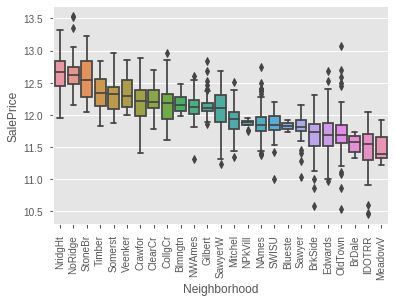

In [13]:
result = df.groupby(["Neighborhood"])['SalePrice'].aggregate(np.median).reset_index().sort_values('SalePrice',ascending=False)
sns.boxplot(x='Neighborhood',y='SalePrice',data=df,order=result['Neighborhood'])
plt.xticks(rotation=90)

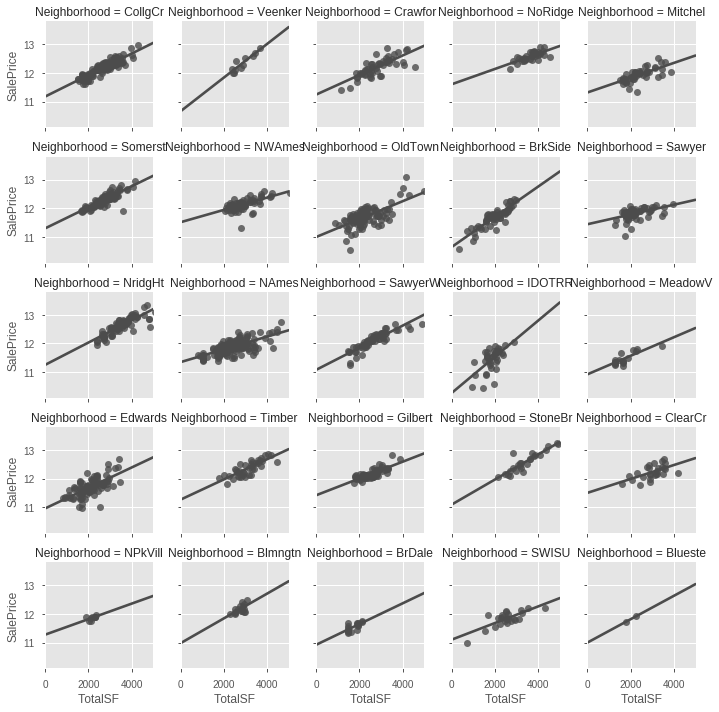

In [14]:
g = sns.FacetGrid(df, col="Neighborhood", col_wrap=5, height=2,xlim=[0,5000])
g.map(sns.regplot, "TotalSF", "SalePrice", color=".3", ci=None);

In [15]:
df.groupby('Neighborhood').agg('mean')['SalePrice']

Neighborhood
Blmngtn    12.169421
Blueste    11.826543
BrDale     11.547874
BrkSide    11.679736
ClearCr    12.232015
CollgCr    12.163647
Crawfor    12.206664
Edwards    11.705330
Gilbert    12.155809
IDOTRR     11.446901
MeadowV    11.474533
Mitchel    11.933954
NAmes      11.868052
NPkVill    11.866484
NWAmes     12.130614
NoRidge    12.676003
NridgHt    12.619415
OldTown    11.703873
SWISU      11.838442
Sawyer     11.811475
SawyerW    12.090695
Somerst    12.296500
StoneBr    12.585490
Timber     12.363460
Veenker    12.344180
Name: SalePrice, dtype: float64